### About Dataset
##### This dataset used in this project provides insights into loan applicants' characteristics and their risk assessment. It comprises information on various attributes of loan applicants, including demographic details, financial status, employment history, and ownership status. The dataset includes both numerical and categorical features, making it suitable for diverse analytical approaches.

##### The goal is to process the data accuratly into order to get some impacful insights out of it.

##### Key Features:

###### Id: Unique identifier for each loan applicant.
###### Income: The income level of the applicant.
###### Age: Age of the applicant.
###### Experience: Years of professional experience.
###### Married/Single: Marital status of the applicant.
###### House_Ownership: Indicates whether the applicant owns or rents a house.
###### Car_Ownership: Indicates whether the applicant owns a car.
###### Profession: Occupation or profession of the applicant.
###### CITY: City of residence of the applicant.
###### STATE: State of residence of the applicant.
###### CURRENT_JOB_YRS: Duration of employment in the current job.
###### CURRENT_HOUSE_YRS: Duration of residence in the current house.
###### Risk_Flag: Binary indicator of loan risk, where 1 represents a flagged risky applicant and 0 represents a non-risky applicant.

In [79]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install chart_studio

In [81]:
# import needed libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

 

In [82]:
init_notebook_mode(connected=True)

In [83]:
import cufflinks as cf 
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [84]:
df = pd.read_json("loan_approval_dataset.json")
df.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


###### df.info() is showing that we have 7 numrical values --int64(7)-- and 6 categorical values --object(6)--

In [86]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [87]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [88]:
df.describe(include=[object])

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [89]:
cols = [ 'Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',]
df[cols]
df[cols].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [90]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

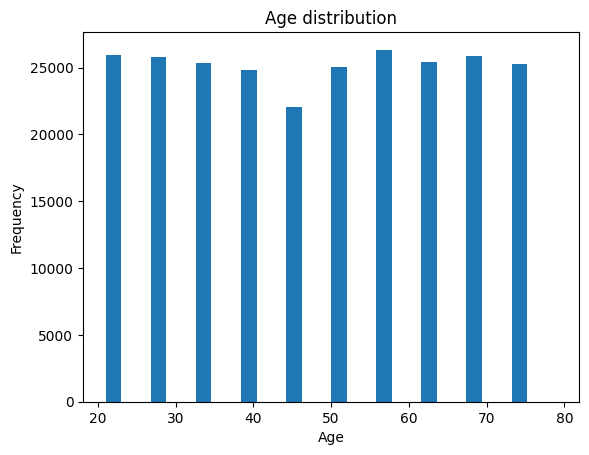

In [91]:
plt.hist(df["Age"], width = 2)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()


<Figure size 640x480 with 0 Axes>

AttributeError: Rectangle.set() got an unexpected keyword argument 'wildth'

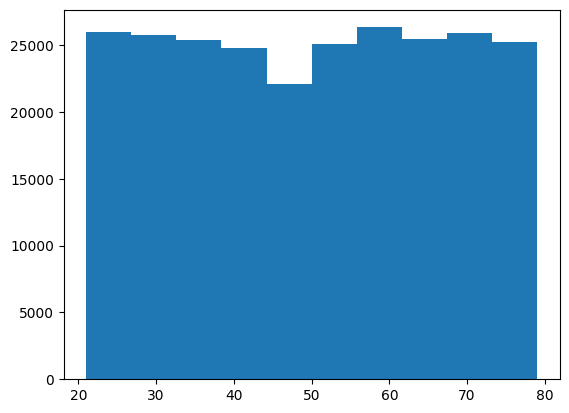

In [94]:
plt.hist(df["Age"], wildth = 1)
ax = plt.gca()